In [73]:
import polars as pl
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib  import pyplot as plt

### load dataFrame with specific compression method

In [74]:
path = "gramalote_row.pkl"
df = pd.read_pickle(path, compression="gzip")

In [75]:
df.head()

,DP,DPNOM,DPMP,MPIO,2005,2006,2007,2008,2009,2010,...,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2
794,54,Norte de Santander,54313.0,Gramalote,6329.0,6231.0,6159.0,6067.0,6002.0,5928.0,...,3004.0,2953.0,2904.0,2874.0,2819.0,2793.0,2753.0,2712.0,2675.0,2648.0


### Take only the data population in the choiceTake only the data population in the selected period

In [76]:
# get the 2005 to 2020 columns
df = df.iloc[:, 4:20]
df.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
794,6329.0,6231.0,6159.0,6067.0,6002.0,5928.0,5853.0,5779.0,5705.0,5649.0,5567.0,5512.0,5442.0,5370.0,5301.0,5240.0


In [77]:
df.to_numpy()

array([[6329., 6231., 6159., 6067., 6002., 5928., 5853., 5779., 5705.,
        5649., 5567., 5512., 5442., 5370., 5301., 5240.]])

### Take the columns and row data in numpy ndarray format

In [78]:
years = df.columns.to_numpy().reshape(-1).astype("int")
population = df.to_numpy().reshape(-1)

### generate new data prediction years

In [80]:
new_dates = np.arange(2021, 2046)

## Lineal growth method

Explain: 

Assume that population growth is going to be data by a linear rate
![](https://ccp.ucr.ac.cr/cursos/demografia_03/Imagenes/quinta4.gif)

where r is the slope

$$ r = \frac{P_{last} - P_{init}}{t_{last}-t_{init} }$$

#### Note that r is the growth speed factor 

In [81]:
r = (population[-1] - population[0] ) / ( years[-1] - years[0])
r

-72.6

In [115]:
new__poblacion  =  population[0] + (r) * (new_dates - years[0]) 
poblacion_2045 = population[-1] + (r) * (2045 - years[-1])

print(new__poblacion, new__poblacion.size)

[5167.4 5094.8 5022.2 4949.6 4877.  4804.4 4731.8 4659.2 4586.6 4514.
 4441.4 4368.8 4296.2 4223.6 4151.  4078.4 4005.8 3933.2 3860.6 3788.
 3715.4 3642.8 3570.2 3497.6 3425. ] 25


In [114]:
new__poblacion = population[-0] + (r) * (new_dates - years[0]) 
print(new__poblacion, new__poblacion.shape)
print(years, years.shape)

[5167.4 5094.8 5022.2 4949.6 4877.  4804.4 4731.8 4659.2 4586.6 4514.
 4441.4 4368.8 4296.2 4223.6 4151.  4078.4 4005.8 3933.2 3860.6 3788.
 3715.4 3642.8 3570.2 3497.6 3425. ] (25,)
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020] (16,)


## Geometric gradient - exponencial method

![](https://ccp.ucr.ac.cr/cursos/demografia_03/Imagenes/quinta12.gif)

In [102]:
# metodo creciente geometrico
r_creciente = pow(population[-1] / population[0], 1 / (years[-1] - years[0])) - 1
r_creciente

-0.012509151736115776

In [94]:
new__poblacion_creciente  = np.array([])
for year in new_dates:
    new__poblacion_creciente = np.append(new__poblacion_creciente, population[0] * pow(r_creciente + 1, (year - years[0])))

new__poblacion_creciente[-1]

3825.2363360253635

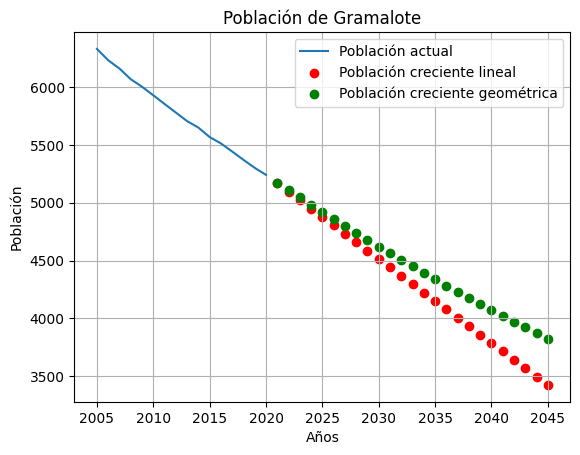

In [113]:
plt.plot(years, population, label="Población actual")
plt.scatter(new_dates, new__poblacion, color="red", label="Población creciente lineal")
plt.scatter(new_dates, new__poblacion_creciente, color="green", label="Población creciente geométrica")
plt.xlabel("Años")
plt.ylabel("Población")
plt.title("Población de Gramalote")
plt.grid(True)
plt.legend()
plt.show()